# IMDb Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('IMDb dataset.csv')

In [3]:
data

,Title ID,Title,Genre,Description,Director,Actors,Years,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40
...,...,...,...,...,...,...,...,...,...,...,...,...
832,833,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37
833,834,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48
834,835,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46
835,836,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50


In [4]:
data.dtypes

Title ID                int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Years                   int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore               int64
dtype: object

In [5]:
data.isnull().sum()

Title ID              0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Years                 0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [6]:
data.columns

Index(['Title ID', 'Title', 'Genre', 'Description', 'Director', 'Actors',
       'Years', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [7]:
data.shape

(837, 12)

# Total Revenue

In [8]:
data['Revenue (Millions)'].sum()

70865.1

# Total Votes

In [9]:
data['Votes'].sum()

161923646

# Total Metascore

In [10]:
data['Metascore'].sum()

49874

# Average Metascore

In [11]:
data['Metascore'].mean()

59.58661887694146

# Highest Rating

In [12]:
data['Rating'].max()

9.0

# Average rating of Movies

In [13]:
data['Rating'].mean()

6.816248506571087

# Highest Runtime (in hours)

In [14]:
data['Runtime (Minutes)'].max()/ 60

3.1166666666666667

# Average Runtime

In [15]:
data['Runtime (Minutes)'].mean()

114.66188769414576

# Top 10 movies that generated the highest Revenue

In [16]:
import numpy as np

In [17]:
df = data.pivot_table(index= 'Title', values= ['Revenue (Millions)'], aggfunc=np.sum).sort_values(['Revenue (Millions)'],
                                                                                                  ascending=0).head(10)

In [18]:
df

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


Text(0.5, 1.0, 'Revenue by Movie')

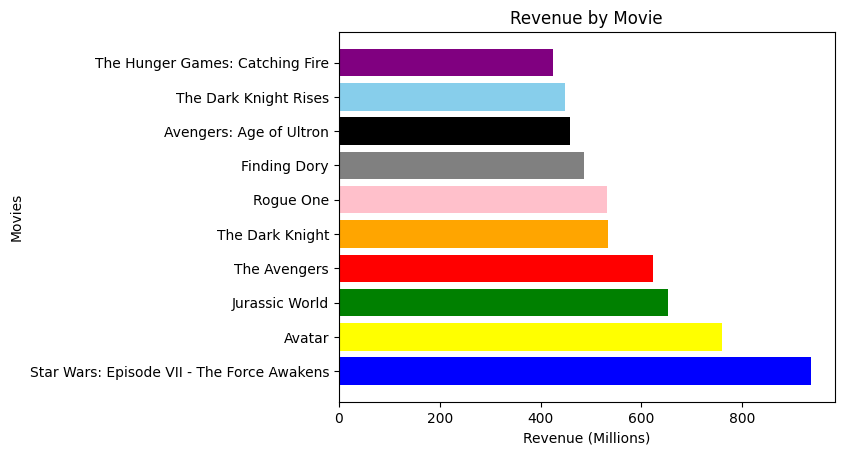

In [19]:
colors = ['blue', 'yellow', 'green', 'red', 'orange', 'pink','grey', 'black','skyblue','purple']
plt.barh(df.index,df['Revenue (Millions)'], color=colors)
plt.yticks(rotation=0)
plt.ylabel('Movies')
plt.xlabel('Revenue (Millions)')
plt.title('Revenue by Movie')

# Revenue based on genre

In [20]:
ab = data.pivot_table(index= 'Genre', values= ['Revenue (Millions)'], aggfunc=np.sum).sort_values(['Revenue (Millions)'], ascending=0).head(10)

In [21]:
ab

,Revenue (Millions)
Genre,
"Action,Adventure,Sci-Fi",10461.51
"Animation,Adventure,Comedy",5754.75
"Action,Adventure,Fantasy",5227.02
"Adventure,Family,Fantasy",2201.47
Comedy,1941.81
"Action,Adventure,Thriller",1739.36
"Animation,Action,Adventure",1651.75
"Action,Adventure,Drama",1385.29
"Adventure,Drama,Fantasy",1380.04


Text(0.5, 1.0, 'Revenue by Genre')

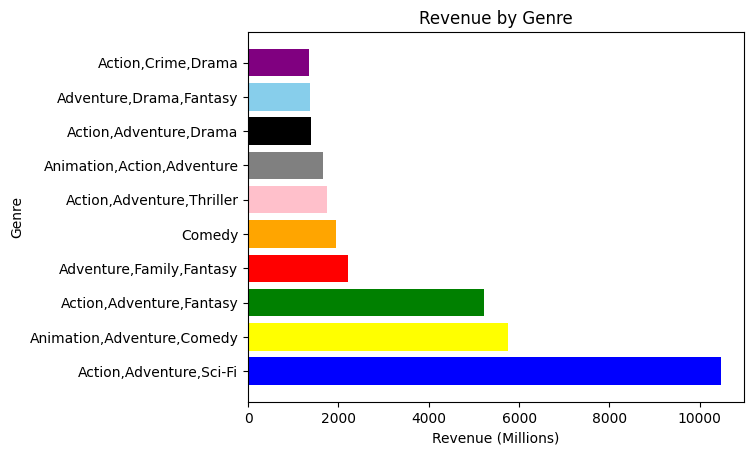

In [22]:
colors = ['blue', 'yellow', 'green', 'red', 'orange', 'pink','grey', 'black','skyblue','purple']
plt.barh(ab.index, ab['Revenue (Millions)'], color=colors)
plt.yticks(rotation=0)
plt.ylabel('Genre')
plt.xlabel('Revenue (Millions)')
plt.title('Revenue by Genre')

# Directors who have generated the highest revenue

In [23]:
ba = data.pivot_table(index= 'Director', values= ['Revenue (Millions)'], aggfunc=np.sum).sort_values(['Revenue (Millions)'],
                                                                                                     ascending=0).head(10)

In [24]:
ba

,Revenue (Millions)
Director,
J.J. Abrams,1683.45
David Yates,1630.51
Christopher Nolan,1515.09
Michael Bay,1421.32
Francis Lawrence,1299.81
Joss Whedon,1082.27
Jon Favreau,1025.60
Zack Snyder,975.74
Peter Jackson,860.45


Text(0.5, 1.0, 'Revenue by Directors')

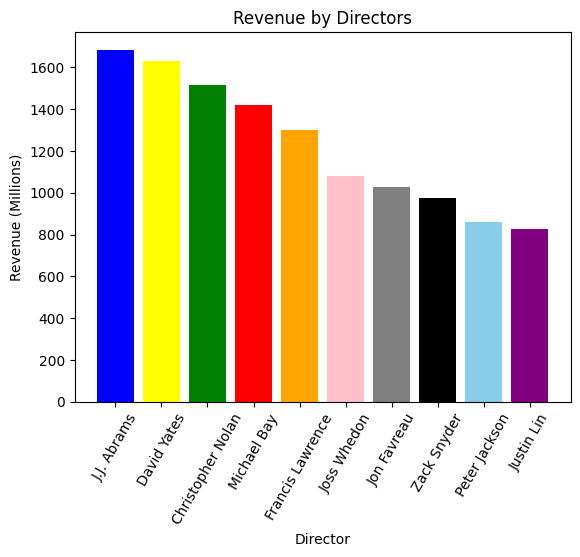

In [25]:
colors = ['blue', 'yellow', 'green', 'red', 'orange', 'pink','grey', 'black','skyblue','purple']
plt.bar(ba.index, ba['Revenue (Millions)'], color=colors)
plt.xticks(rotation=60)
plt.ylabel('Revenue (Millions)')
plt.xlabel('Director')
plt.title('Revenue by Directors')

# Revenue by Year

In [26]:
cd=data.groupby('Years')['Revenue (Millions)'].sum().sort_values(ascending=False)

In [27]:
cd

Years
2016    11002.09
2015     8799.09
2014     7945.33
2013     7399.11
2012     6826.39
2010     5989.65
2011     5341.09
2009     5208.39
2008     4681.22
2007     4095.26
2006     3577.48
Name: Revenue (Millions), dtype: float64

In [29]:
all_years = sorted(data['Years'].unique())

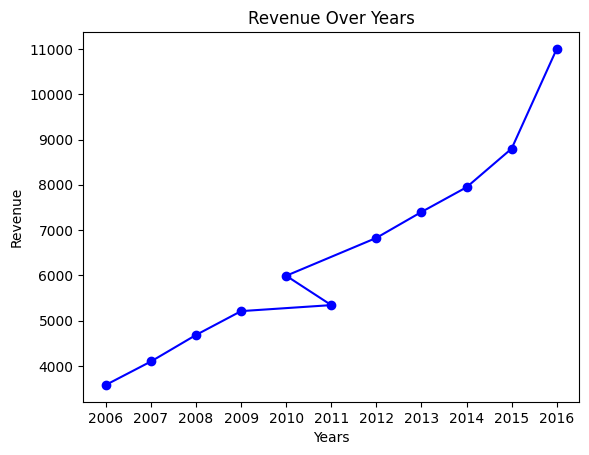

In [30]:
plt.plot(cd.index, cd.values, marker='o', linestyle='-', color='blue', label='Revenue')
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.title('Revenue Over Years')
plt.xticks(all_years);

# Top 10 Highest Rated Movies

In [31]:
Rating=data.groupby('Title')['Rating'].max().sort_values(ascending=False).head(10)

In [32]:
Rating

Title
The Dark Knight          9.0
Inception                8.8
Interstellar             8.6
Kimi no na wa            8.6
The Intouchables         8.6
Taare Zameen Par         8.5
The Dark Knight Rises    8.5
The Lives of Others      8.5
The Departed             8.5
The Prestige             8.5
Name: Rating, dtype: float64

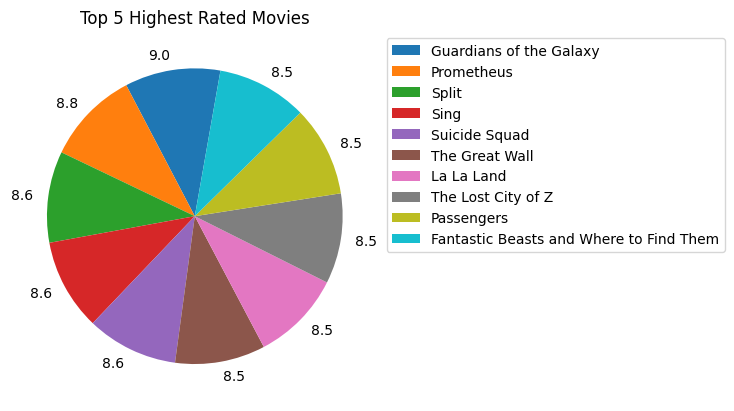

In [33]:
plt.pie(Rating, labels=Rating.values, startangle=80)
plt.legend(data['Title'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Top 5 Highest Rated Movies');

# Movies Runtime

In [34]:
runtime = data.pivot_table(index= 'Title', values= ['Runtime (Minutes)'], aggfunc=np.sum).sort_values(['Runtime (Minutes)'],
                                                                                                     ascending=0).head(10)

In [35]:
runtime

,Runtime (Minutes)
Title,
The Host,245
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Pirates of the Caribbean: At World's End,169
The Hobbit: An Unexpected Journey,169
Interstellar,169


Text(0.5, 1.0, 'Runtime by Movies Top 10')

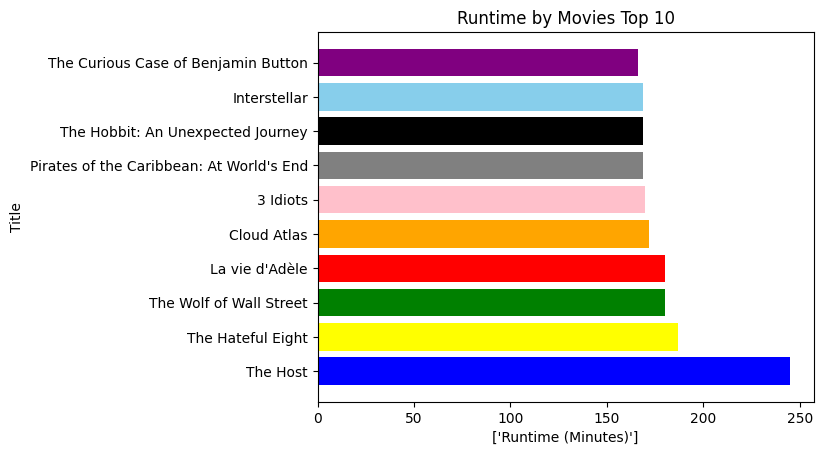

In [36]:
colors = ['blue', 'yellow', 'green', 'red', 'orange', 'pink','grey', 'black','skyblue','purple']
plt.barh(runtime.index, runtime['Runtime (Minutes)'], color=colors)
plt.yticks(rotation=0)
plt.ylabel('Title')
plt.xlabel(['Runtime (Minutes)'])
plt.title('Runtime by Movies Top 10')

# Top 10 highly Voted movies

In [37]:
votes=data.groupby('Title')['Votes'].max().sort_values(ascending=False).head(10)

In [38]:
votes

Title
The Dark Knight          1791916
Inception                1583625
The Dark Knight Rises    1222645
Interstellar             1047747
The Avengers             1045588
Django Unchained         1039115
Inglourious Basterds      959065
The Departed              937414
Avatar                    935408
The Prestige              913152
Name: Votes, dtype: int64

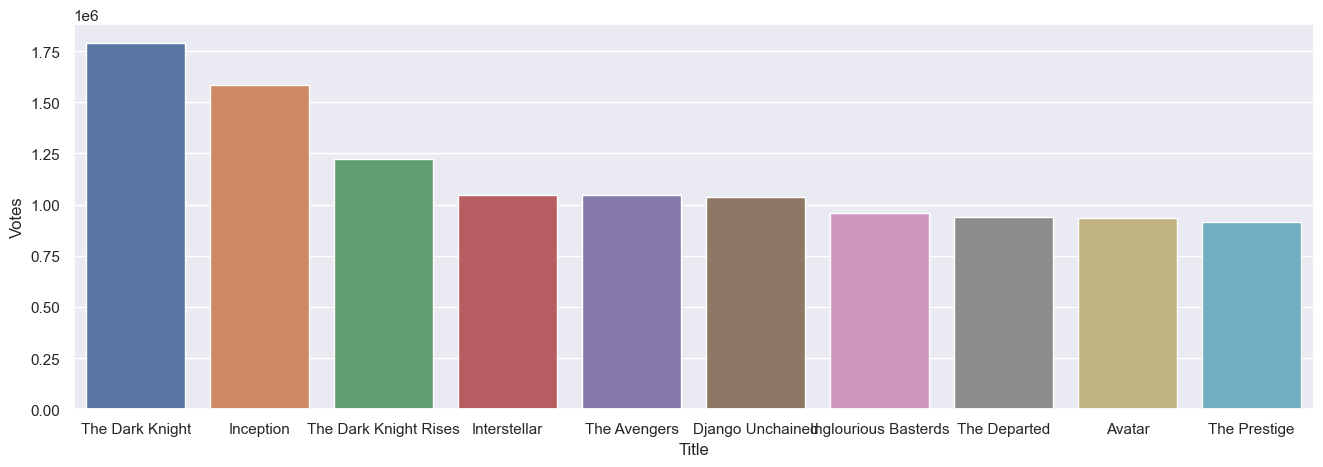

In [39]:
votes=data.groupby(['Title'],as_index=False)['Votes'].max().sort_values(by='Votes',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='Title',y='Votes',data=votes);

# Top 10 highly Voted movies by directors

In [40]:
dir_votes=data.groupby('Director')['Votes'].max().sort_values(ascending=False).head(10)

In [41]:
dir_votes

Director
Christopher Nolan    1791916
Joss Whedon          1045588
Quentin Tarantino    1039115
Martin Scorsese       937414
James Cameron         935408
James Gunn            757074
Jon Favreau           737719
Gary Ross             735604
Pete Docter           722203
Danny Boyle           677044
Name: Votes, dtype: int64